In [41]:
import os
import warnings
warnings.filterwarnings('ignore')

import anndata as ad
import scanpy as sc
import cellanova as cnova
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import mplscience

In [42]:
adata = sc.read_h5ad('../output/1_before_integration.h5ad')
adata

AnnData object with n_obs × n_vars = 53408 × 29009
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP'
    layers: 'counts'

In [43]:
integrate_key = 'sample_id'

In [44]:
adata_prep = cnova.model.preprocess_data(adata, integrate_key=integrate_key)
adata_prep

AnnData object with n_obs × n_vars = 53408 × 3000
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg'
    layers: 'counts', 'lognorm', 'scale'

In [45]:
g1 = set(adata_prep[adata_prep.obs['sample_info'].str.startswith('Control'),].obs[integrate_key])
g2 = set(adata_prep[adata_prep.obs['sample_info'].str.startswith('Mid'),].obs[integrate_key])
g3 = set(adata_prep[adata_prep.obs['sample_info'].str.startswith('SNU'),].obs[integrate_key])
g4 = set(adata_prep[adata_prep.obs['sample_info'].str.startswith('S'),].obs[integrate_key]).difference(g3)

In [46]:
control_dict = {
    'g1': list(g1),
    'g2': list(g2),
    'g3': list(g3),
    'g4': list(g4),
}
control_dict

{'g1': ['Control'],
 'g2': ['SRR24731559', 'SRR24731560'],
 'g3': ['SRR22475911'],
 'g4': ['SRX22734310', 'SRX22734311', 'SRX22734312', 'SRX22734314']}

- calculate main effect

In [47]:
adata_prep= cnova.model.calc_ME(adata_prep, integrate_key=integrate_key)
adata_prep

2024-12-03 18:40:31,779 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-12-03 18:40:34,131 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-03 18:40:34,250 - harmonypy - INFO - Iteration 1 of 30
2024-12-03 18:40:44,770 - harmonypy - INFO - Iteration 2 of 30
2024-12-03 18:40:54,344 - harmonypy - INFO - Iteration 3 of 30
2024-12-03 18:41:03,894 - harmonypy - INFO - Iteration 4 of 30
2024-12-03 18:41:13,687 - harmonypy - INFO - Iteration 5 of 30
2024-12-03 18:41:22,750 - harmonypy - INFO - Iteration 6 of 30
2024-12-03 18:41:32,004 - harmonypy - INFO - Iteration 7 of 30
2024-12-03 18:41:39,921 - harmonypy - INFO - Iteration 8 of 30
2024-12-03 18:41:46,510 - harmonypy - INFO - Iteration 9 of 30
2024-12-03 18:41:55,167 - harmonypy - INFO - Iteration 10 of 30
2024-12-03 18:42:04,718 - harmonypy - INFO - Iteration 11 of 30
2024-12-03 18:42:14,751 - harmonypy - INFO - Iteration 12 of 30
2024-12-03 18:42:23,480 - harmonypy - INFO - Converged after

AnnData object with n_obs × n_vars = 53408 × 3000
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg'
    obsm: 'Cmat'
    varm: 'Mmat'
    layers: 'counts', 'lognorm', 'scale', 'main_effect'

- calculate batch effect

In [48]:
adata_prep = cnova.model.calc_BE(adata_prep, integrate_key=integrate_key, control_dict=control_dict)
adata_prep

AnnData object with n_obs × n_vars = 53408 × 3000
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'S_BE_basis'
    obsm: 'Cmat'
    varm: 'Mmat', 'V_BE_basis'
    layers: 'counts', 'lognorm', 'scale', 'main_effect', 'corrected'

- calculate biological effect

In [49]:
adata_prep = cnova.model.calc_TE(adata_prep, integrate_key=integrate_key)
adata_prep

AnnData object with n_obs × n_vars = 53408 × 3000
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'S_BE_basis', 'S_TE_basis'
    obsm: 'Cmat'
    varm: 'Mmat', 'V_BE_basis', 'W_TE_basis'
    layers: 'counts', 'lognorm', 'scale', 'main_effect', 'corrected', 'trt_effect', 'denoised'

In [50]:
integrated = ad.AnnData(adata_prep.layers['denoised'], dtype=np.float32)
integrated.obs = adata_prep.obs.copy()
integrated.var_names = adata_prep.var_names
sc.pp.neighbors(integrated)
sc.tl.umap(integrated)

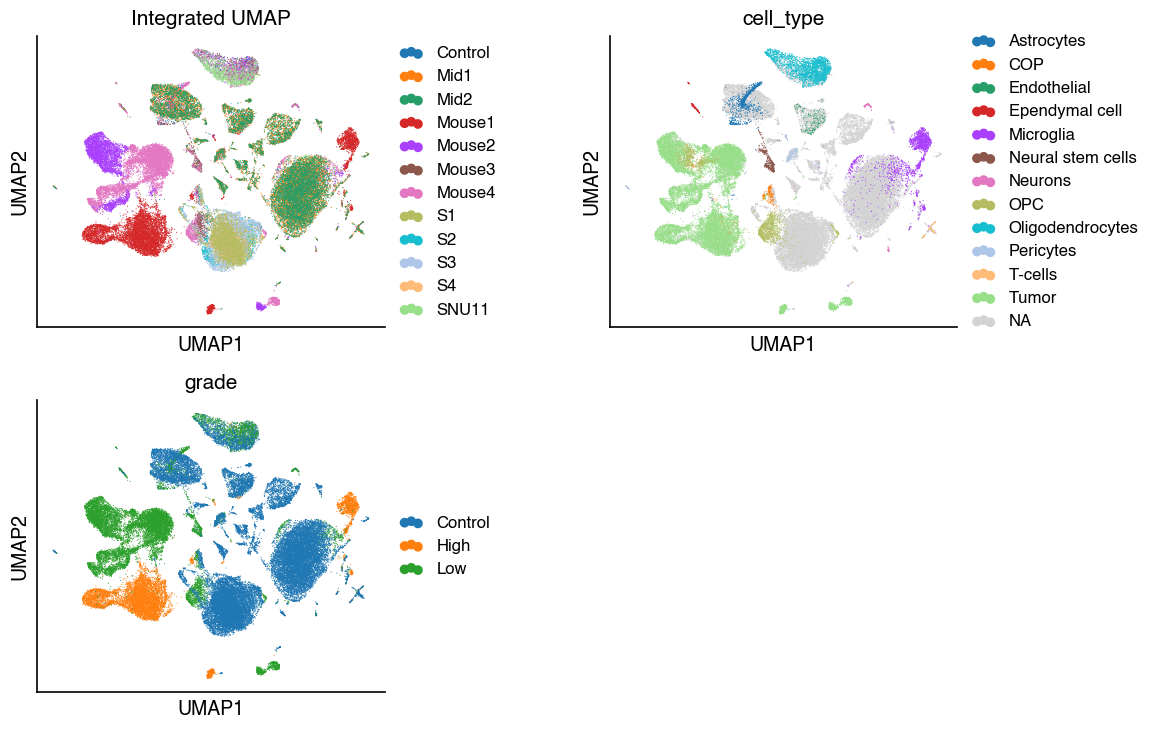

In [51]:
with mplscience.style_context():
    sc.pl.umap(integrated, color=['sample_info', 'cell_type', 'grade'], title='Integrated UMAP', wspace = 0.5, ncols = 2)

In [ ]:
integrated.save('../output/4_cellanova.h5ad')